# Universidad Autónoma de Nuevo León
# Facultad de Ciencias Físico Matemáticas
# Maestría en Ciencia de Datos

## Procesamiento y clasificación de datos

### Tarea 1

###### Jorge Loredo

### Componentes del Análisis de Texto
#### Preprocesamiento de Texto
- Limpieza de datos: eliminación de signos de puntuación, números, palabras vacías (_stopwords_).
- Tokenización: dividir el texto en unidades más pequeñas (tokens).

#### Representación de Texto
- Bolsa de palabras (Bag of Words): representación vectorial basada en la frecuencia de palabras.
- Modelos de incrustación de palabras (Word Embeddings): representación densa de palabras en un espacio vectorial.

### Obtención de datos

#### Recursos de orígenes de datos
- Alternativas para obtener fuentes de noticias: https://www.newscatcherapi.com/blog/python-web-scraping-libraries-to-mine-news-data
- Webscrapper de Reddit: https://github.com/praw-dev/praw
- Tweets de X: https://www.tweepy.org/
- Artículos de Wikipedia: https://github.com/goldsmith/Wikipedia

In [1]:
# https://github.com/raduangelescu/gutenbergpy
!pip install gutenbergpy
!pip install praw -q
!pip install wordcloud -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 14.2 MB/s eta 0:00:00
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29250 sha256=34861524ff4339bb4b0a4f04c37184cf8178b7ef652bd353d2fe21b7c585d8dd
  Stored in directory: /root/.cache/pip/wheels/e6/5c/6b/790df3d7037e3d9aaf7a48d563626941f2f60198d2f1eef8d2
Successfully built httpsproxy-urllib2


In [18]:
import gutenbergpy.textget
import pandas as pd
import praw
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from nltk.util import ngrams
from collections import Counter


In [8]:
# Configuración de Reddit API
reddit = praw.Reddit(
    client_id="EEPZITq9hYh9vlgws1y5XQ",
    client_secret="gtMAaA2jExW07AnG3o93qZy21hdvFw",
    user_agent="explorador_carros"
)


subreddit = reddit.subreddit("cars")
print(f"Extrayendo publicaciones del subreddit: {subreddit.display_name}")

#for post in subreddit.hot(limit=10):  # Cambia "hot" por "new" o "top" según tu interés
#    print(f"Título: {post.title}")
#    print(f"Texto: {post.selftext}")
#    print(f"URL: {post.url}")
#    print(f"Upvotes: {post.score}")
#    print("-" * 50)

#for post in reddit.subreddit("all").search("climate change", limit=10):
#print(f"Título: {post.title}")
#print(f"Subreddit: {post.subreddit}")
#print(f"Upvotes: {post.score}")



Extrayendo publicaciones del subreddit: cars


In [9]:
post = reddit.submission(url="https://www.reddit.com/r/cars/comments/1737o1u/whats_your_daily_driver_and_why/")
post.comments.replace_more(limit=0)
for comment in post.comments.list():
    print(f"Comentario: {comment.body}")
#post.comments.list()

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comentario: My 911 because who needs practicality or a spine.
Comentario: A hellcat redeye charger. 
Because I’m stupid and hate moneu
Comentario: [deleted]
Comentario: Tacoma cuz I hate power, fuel economy, and love hunting for gears.
Comentario: Heavily modified 1977 MGB.  Just because I refuse to be normal.
Comentario: M3 Competition, because I dailied an S2000 all throughout college and that was very much a "never meet your heroes" moment that was ruining my dream car for me. Worst daily driver ever. Now with the M3 as a daily, the S2000 again feels like the baby F1 car that I bought it to be.
Comentario: Life is too short to not drive something fun on the daily, but I only have room for one car at my house, so all-arounder M car it is.
Comentario: [deleted]
Comentario: I take a tram most days.
Comentario: Ford Focus ST, because hot hatchback practically and speed
Comentario: CT4 V Blackwing. Reason: zoom zoom
Comentario: Alfa Romeo Giulia. I wanted a driver's car. I couldn't stop 

In [13]:
comments = [comment.body for comment in post.comments.list()]

# Convertir a DataFrame para análisis
df = pd.DataFrame(comments, columns=["Comentario"])


In [14]:
# Estadísticas descriptivas
print("Número total de comentarios:", df.shape[0])
df["Longitud"] = df["Comentario"].apply(len)
print("Longitud promedio de comentarios:", df["Longitud"].mean())
print("Longitud máxima:", df["Longitud"].max())
print("Longitud mínima:", df["Longitud"].min())


Número total de comentarios: 487
Longitud promedio de comentarios: 205.71457905544148
Longitud máxima: 2141
Longitud mínima: 4


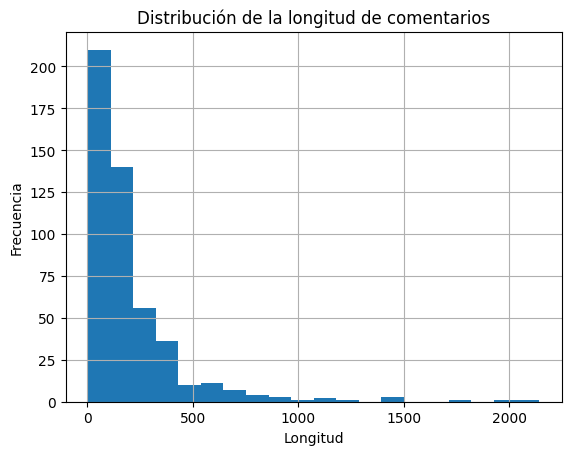

In [15]:
df["Longitud"].hist(bins=20)
plt.title("Distribución de la longitud de comentarios")
plt.xlabel("Longitud")
plt.ylabel("Frecuencia")
plt.show()


In [21]:
#Descarga comentarios
nltk.download('punkt_tab')
all_words = [word.lower() for comment in df["Comentario"] for word in word_tokenize(comment)]
freq_dist = FreqDist(all_words)

# Palabras más comunes
print("Palabras más comunes:")
print(freq_dist.most_common(10))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Palabras más comunes:
[('.', 1116), ('the', 779), ('i', 690), (',', 686), ('a', 583), ('and', 495), ('it', 480), ('to', 429), ('is', 283), ('’', 276)]


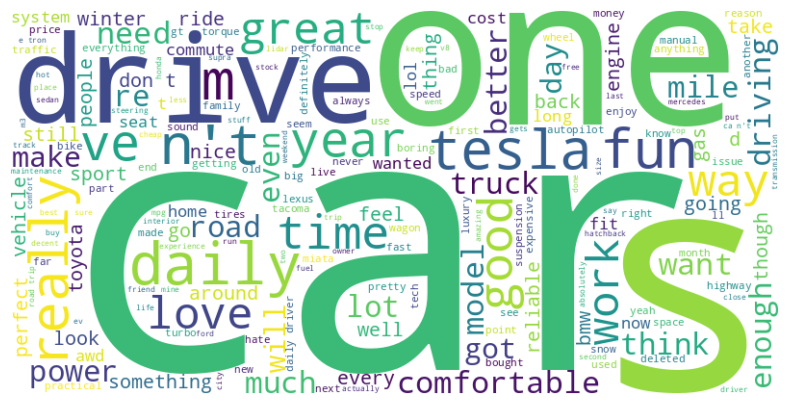

In [22]:
#Palabras mas usadas
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [24]:
# Generar bigrams
bigrams = list(ngrams(all_words, 2))
bigram_freq = Counter(bigrams)

print("Bigrams más comunes:")
print(bigram_freq.most_common(5))


Bigrams más comunes:
[(('.', 'i'), 212), (('’', 's'), 113), (('.', 'it'), 86), ((',', 'and'), 81), (('it', '’'), 81)]


In [25]:
car_brands = ["toyota", "honda", "ford", "bmw", "audi", "chevrolet", "nissan", "tesla", "volkswagen"]
df["Marcas"] = df["Comentario"].apply(lambda x: [brand for brand in car_brands if brand in x.lower()])

# Conteo de menciones de marcas
brand_counts = Counter([brand for brands in df["Marcas"] for brand in brands])
print("Marcas mencionadas:")
print(brand_counts)


Marcas mencionadas:
Counter({'tesla': 26, 'bmw': 19, 'ford': 17, 'toyota': 14, 'honda': 12, 'audi': 6, 'nissan': 4, 'volkswagen': 2})
